Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.
● Build data profiles and tables - Inferential statistics
● Explore data relationships - Data visualization
● Feature Selection and Engineering

Suggested Questions about the data.

1. How does price differ based on school control (public, private nonprofit, private for-profit)?
2. Does size (student enrollment and number of faculty) vary by control?
3. What factors contribute to schools closing? What is the distribution of closed schools (by region, size, control)
4. Does student debt contribute to schools closing? How does student debt relate to school size and control?
 f

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the preprocessed data
filename = "./data/processed/college.filtered.csv"
data = pd.read_csv(filename, dtype={'OPEID':object, 'Zip':object}, index_col=0)
data.head()

,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,High degree,...,MedianDebtNotComplete,PercentReceiveFedLoan,AvgAgeEntry,PercentFemale,PercentMarried,PercentDependent,PercentVeteran,AvgFamilyIncome,MedianFamilyIncome,MedianHouseholdIncome
0,1,01230800,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,361126613,NaN,True,1,Predominantly associate's-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00100200,ALABAMA A & M UNIVERSITY,NORMAL,35762,NaN,True,1,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,00105200,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,352940110,NaN,True,2,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00574900,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,36360,NaN,True,1,Predominantly certificate-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,02503400,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,361173553,NaN,True,1,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Build data profiles and tables

What are the columns in the data? What are the data types? How many columns contain null values?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 124698
Data columns (total 54 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            124699 non-null  int64  
 1   OPEID                         124699 non-null  object 
 2   Name                          124699 non-null  object 
 3   City                          124699 non-null  object 
 4   Zip                           124699 non-null  object 
 5   Predominant degree            101334 non-null  float64
 6   Main branch                   124699 non-null  bool   
 7   NumBranches                   124699 non-null  int64  
 8   Primary degree type           124699 non-null  object 
 9   High degree                   124699 non-null  object 
 10  Control                       124676 non-null  object 
 11  StateCode                     124669 non-null  object 
 12  Region                        124669 non-nul

According to the data dictionary, columns 8-12 are categorical variables, however they have been imported as strings here. I can convert them to categories later, if I decide that will make them easier to work with.

Columns 45-53(and several others) contain relatively few values, so I suspect that they will need to be removed. More exploration of null values will follow later.

What are the ranges and distributions of the numerical variables?

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,124699.0,62350.000000,35997.644946,1.000000,31175.500000,62350.000000,93524.500000,1.246990e+05
Predominant degree,101334.0,1.971628,0.876321,1.000000,1.000000,2.000000,3.000000,3.000000e+00
NumBranches,124699.0,3.737648,12.623389,1.000000,1.000000,1.000000,2.000000,1.410000e+02
AdmissionRate,34156.0,0.696963,0.223910,0.000000,0.555600,0.721100,0.861525,1.000000e+01
ACTMidpoint,15871.0,22.722954,3.265049,2.000000,21.000000,22.000000,24.000000,3.500000e+01
SATAvg,18598.0,1052.701043,126.892749,514.000000,970.000000,1035.000000,1115.000000,1.599000e+03
Enrollment-DegreeSeeking,110343.0,2151.355673,4734.967374,0.000000,115.000000,490.000000,1989.000000,2.535940e+05
NetPrice-Private,18560.0,17982.273545,7462.132716,-103168.000000,13120.750000,18179.500000,22487.000000,8.757000e+04
AvgCost-AY,20504.0,23002.166699,11575.691881,2200.000000,13293.000000,21395.500000,29439.500000,7.447300e+04
TuitionRevenue/FTE,106055.0,13423.722616,138429.201381,0.000000,2489.000000,5759.000000,10627.000000,2.667016e+07


Check for null values, both as a count and as a percentage of the column data.

In [5]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                               Count   Percent
Predominant degree             23365  0.187371
Control                           23  0.000184
StateCode                         30  0.000241
Region                            30  0.000241
AdmissionRate                  90543  0.726092
ACTMidpoint                   108828  0.872726
SATAvg                        106101  0.850857
Enrollment-DegreeSeeking       14356  0.115125
NetPrice-Private              106139  0.851162
AvgCost-AY                    104195  0.835572
TuitionRevenue/FTE             18644  0.149512
Expenditure/FTE                18650  0.149560
AvgFaculty Salary              55047  0.441439
Percent Fulltime Faculty       63748  0.511215
Completion-4yr                 89819  0.720286
Completion<4yr                 63229  0.507053
RetentionFT-4yr               101800  0.816366
RetentionFT-<4yr               87419  0.701040
RetentionPT-4yr               109322  0.876687
RetentionPT-<4yr              102212  0.819670
PercentFedLoa

As suggested above, columns 45-53 (and others) contain more than 70% missing data. In the preprocessing stage, columns with more than 90% of the missing data were excluded. This step will remove columns with more than 70% missing data.

In [6]:
# Make a list of columns with >70% missing data
to_drop = [column for column in data.columns if (data[column].isnull().sum()/len(data[column]) > 0.70)]
print("Columns to drop include: ", to_drop)
print("Number of columns to drop: ", len(to_drop))

# Drop column with >70% missing data
data = data.drop(to_drop, axis=1)
print(data.shape)

Columns to drop include:  ['AdmissionRate', 'ACTMidpoint', 'SATAvg', 'NetPrice-Private', 'AvgCost-AY', 'Completion-4yr', 'RetentionFT-4yr', 'RetentionFT-<4yr', 'RetentionPT-4yr', 'RetentionPT-<4yr', 'PercentFedLoan', 'PercentReceiveFedLoan', 'AvgAgeEntry', 'PercentFemale', 'PercentMarried', 'PercentDependent', 'PercentVeteran', 'AvgFamilyIncome', 'MedianFamilyIncome', 'MedianHouseholdIncome']
Number of columns to drop:  20
(124699, 34)


## Explore the number of schools in the database
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [7]:
n_data = data.shape[0]
print("There are ", n_data, " observations in the data")

n_opeid = data["OPEID"].nunique()
print("There are ", n_opeid, "unique OPEIDs in the data")
print(data.OPEID.value_counts())

There are  124699  observations in the data
There are  11511 unique OPEIDs in the data
00224900    37
00147900    23
00104700    23
00747000    21
00370200    21
            ..
02563100     1
02585000     1
03636300     1
04210700     1
00757305     1
Name: OPEID, Length: 11511, dtype: int64


In [8]:
data['Name'] = data['Name'].str.lower()
n_schools = data['Name'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.Name.value_counts())

There are  14971 unique school names in the data
itt technical institute                               672
marinello school of beauty                            212
empire beauty school                                  190
lincoln technical institute                           167
ross medical education center                         148
                                                     ... 
central texas beauty college 3                          1
advanced institute of hair design-madison               1
yti career institute-mechanicsburg                      1
southern california international college               1
university of pennsylvania medical center presbyte      1
Name: Name, Length: 14971, dtype: int64


There are 11511 OPEID numbers and 14971 unique school names in the data, which means that some school names share OPEID numbers. To get a sense for the data, I think it will be important to know how schools names relate to the OPEID numbers.

First - how many school names occur only once in the database? What are those names?

In [9]:
unique_names = data.Name.value_counts(ascending = True)[data.Name.value_counts()==1]
print(unique_names)

university of pennsylvania medical center presbyte            1
southern california international college                     1
yti career institute-mechanicsburg                            1
advanced institute of hair design-madison                     1
central texas beauty college 3                                1
                                                             ..
south central louisiana technical college-lafourche campus    1
southern careers institute1 inc.                              1
itt technical institute-high point                            1
ai miami international university of art and desig            1
academy of court reporting and technology                     1
Name: Name, Length: 2276, dtype: int64


There are 2276 school names that only occur once the database. That means that there are roughly 13000 school names that occur more than once.  How many schools occur multiple times, and how many times do they occur?

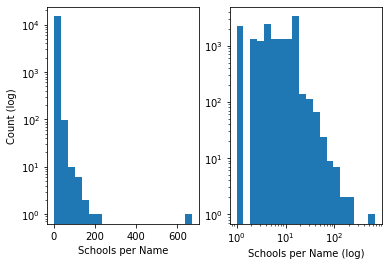

In [10]:
#Plot histogram of number of schools per Name
plt.subplot(1, 2, 1)
#plt.hist(data['Name'].value_counts())
hist, bins, _ = plt.hist(data['Name'].value_counts(), bins=20)
plt.xlabel('Schools per Name')
plt.ylabel('Count (log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Converted to logarithmic scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['Name'].value_counts(), bins=logbins)
plt.xlabel('Schools per Name (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

There is one school with more than 600 occurences in the database, which skews the histogram and its bin sizes. Converting the number of schools (and counts) to a log scale more clearly shows the distribution of the schools by their count in the data.

While there are many unique school names, there are also equally many schools names with counts of 100 (or 200).

Now that we have a sense of how often school names are repeated in the database, we can explore the distribution of the OPEID. 

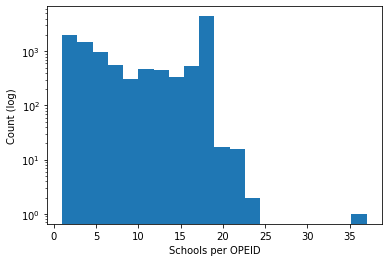

In [11]:
#Plot histogram of number of schools per OPEID
plt.hist(data['OPEID'].value_counts(), bins=20)
plt.xlabel('Schools per OPEID')
plt.ylabel('Count (log)')
plt.yscale('log')

The number of observations per OPEID are much less varied than the school names, with the max count being around 35. This must mean that schools with the same name can have multiple OPEIDs.

From the list and counts of school names (above), ITT Technical Institute occurs 672 times in the database. How many OPEIDs are associated with ITT Tech?

In [12]:
itt = data.loc[data['Name'].str.startswith('itt tech')] # TECHNICAL INSTITUTE']
print(itt.OPEID.value_counts())
print("ITT Technical Institue has 672 schools distrubted over 254 OPEIDs")

00732902    18
03071800    18
00732903    18
03071801    18
00732901    18
            ..
01062706     1
00455303     1
10732958     1
03070401     1
02321903     1
Name: OPEID, Length: 254, dtype: int64
ITT Technical Institue has 672 schools distrubted over 254 OPEIDs


The maximum number of OPEIDs associated with ITT Tech is 18. How are the schools/names associated with one OPEID related?

In [13]:
itt_sample = data.loc[data.OPEID == '00732903']
itt_sample

,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,High degree,...,PercentAidedLowIncome,PercentIndependent,PercentDependentLowIncome,PercentIndepentdentLowIncome,PercentFirstGen,AvgIncomeDependent,AvgIncomeIndep,MedianDebt,MedianDebtCompleters,MedianDebtNotComplete
5701,5702,00732903,itt technical institute-houston,HOUSTON,770905818,NaN,True,4,Predominantly associate's-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12240,12241,00732903,itt technical institute,HOUSTON,770905818,NaN,True,5,Predominantly associate's-degree granting,Associate degree,...,0.635055,0.496016,0.437022,0.836269,0.551735,58425.61298,26187.55805,8574.5,12469.0,3938.5
18783,18784,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.627427,0.493280,0.437132,0.822906,0.543544,58977.57059,26614.57650,8834.0,13513.0,3928.0
25218,25219,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.617428,0.493476,0.433763,0.805949,0.555260,59465.38238,27163.26105,9329.0,14070.0,4417.0
31583,31584,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.613342,0.524248,0.434041,0.776057,0.571004,59925.51167,29234.85648,9799.0,14125.0,4417.0
38058,38059,00732903,itt technical institute,HOUSTON,770905821,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.603545,0.546107,0.430054,0.747740,0.565508,61715.74188,30800.44818,10028.5,14125.0,4417.0
44589,44590,00732903,itt technical institute,HOUSTON,77090-5821,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.605835,0.548366,0.426906,0.753200,0.574435,60736.87755,29543.46739,9792.0,18216.0,5348.0
51083,51084,00732903,itt technical institute,HOUSTON,77090-5818,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.615309,0.575167,0.434460,0.748888,0.585259,57378.32294,28381.15320,9791.0,20030.0,4886.5
57592,57593,00732903,itt technical institute,HOUSTON,77090-581,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.622331,0.612181,0.423736,0.748142,0.555018,57458.37104,28320.93152,9126.0,20624.0,4417.0
64220,64221,00732903,itt technical institute,Houston,77090-5821,2.0,True,6,Predominantly associate's-degree granting,Associate degree,...,0.630033,0.635318,0.413470,0.754343,0.532114,57185.20615,27828.79673,8834.0,21124.0,4417.0


All of these schools are in Houston. They may have different names - some include the name "Houston" or "Houston-North."
They also all have different IDs, which leads to some questions about how the ID number relates to the OPEID and the school name. This information may be in the data dictionary, or other meta-data documents.

## Explore categorical columns
Reprint the column names, to kow what to analyze next.

In [14]:
data.columns

Index(['Id', 'OPEID', 'Name', 'City', 'Zip', 'Predominant degree',
       'Main branch', 'NumBranches', 'Primary degree type', 'High degree',
       'Control', 'StateCode', 'Region', 'Enrollment-DegreeSeeking',
       'CURROPER', 'TuitionRevenue/FTE', 'Expenditure/FTE',
       'AvgFaculty Salary', 'Percent Fulltime Faculty', 'Completion<4yr',
       'PercentAge>25', 'PercentCompleted4yr', 'PercentWithdraw4yr',
       'PercentEnrolled4yr', 'PercentAidedLowIncome', 'PercentIndependent',
       'PercentDependentLowIncome', 'PercentIndepentdentLowIncome',
       'PercentFirstGen', 'AvgIncomeDependent', 'AvgIncomeIndep', 'MedianDebt',
       'MedianDebtCompleters', 'MedianDebtNotComplete'],
      dtype='object')

What are the values (and distributions) of the "Predominant degree" column? In the preprocessing step, this column was converted to a category. It is being processed here as a float. It is unclear at this point how the original string categories were converted to numbers.
After consulting with the data dictionary, this column contains data from "Primary degree type" that has been recoded to eliminate some of the values (Not classified and Entirely graduate-degree granting). Since this data is available in another column, I have decided to eliminate the "Predominant degree" column.

In [15]:
data['Predominant degree'].value_counts()
data=data.drop('Predominant degree', axis=1)

What are the values (and distributions) of the "Main branch" column?

Result: All of the observations in the data are coded as a "Main branch" which means it is not a meaningful variable, so I'll drop it.

In [16]:
print(data['Main branch'].value_counts())
data= data.drop('Main branch', axis=1)

True    124699
Name: Main branch, dtype: int64


Since all schools are labeled as main branches, how many other branches are associated with each school? This is in the NumBranches column.

1      91561
2      11535
3       5970
4       3286
5       2010
6       1490
8        758
7        752
9        633
11       584
10       579
23       347
14       314
141      282
78       234
13       234
74       222
22       198
19       192
31       186
26       182
86       172
28       171
16       161
38       152
12       149
17       136
15       136
128      128
42       126
20       120
119      119
99       101
93        95
18        92
44        88
84        85
85        85
39        78
72        72
68        72
71        71
70        70
63        63
60        60
59        59
27        54
54        54
51        51
50        50
21        42
41        41
40        40
36        36
34        34
33        33
30        30
24        24
Name: NumBranches, dtype: int64


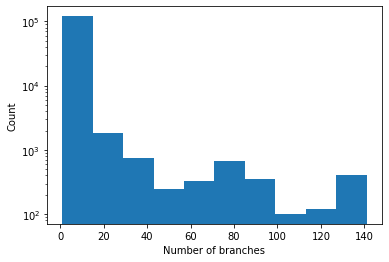

In [17]:
print(data['NumBranches'].value_counts())
plt.hist(data['NumBranches'])
plt.xlabel('Number of branches')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Most of the schools (91561) have only one branch, while a few have more than 100 branches. It will be interesting to see how the number of branches might relate to school name and OPEID, particularly for the schools with more than 100 branches.

What are the values and distribution of the 'Primary degree type' column? In the preprocessing step, they were converted to categorical data, but they have been imported here as a string. Should they be re-convereted to categorical data?

In [18]:
print(data['Primary degree type'].value_counts())
data['Primary degree type'].astype('category')

Predominantly certificate-degree granting    52605
Predominantly bachelor's-degree granting     35199
Predominantly associate's-degree granting    26670
Not classified                                5228
Entirely graduate-degree granting             4997
Name: Primary degree type, dtype: int64


0         Predominantly associate's-degree granting
1          Predominantly bachelor's-degree granting
2          Predominantly bachelor's-degree granting
3         Predominantly certificate-degree granting
4          Predominantly bachelor's-degree granting
                            ...                    
124694                               Not classified
124695                               Not classified
124696                               Not classified
124697                               Not classified
124698                               Not classified
Name: Primary degree type, Length: 124699, dtype: category
Categories (5, object): [Entirely graduate-degree granting, Not classified, Predominantly associate's-degree granting, Predominantly bachelor's-degree granting, Predominantly certificate-degree granting]

Based on the 5 different values, it does seem that this column contains categorical data, so it has been adjusted accordingly. I think I'm primarily intersted in undergraduate institutions, and may drop the 'Entirely graduate-degree granting' institutions for further analysis at a later time.

What are the values and distributions in the 'High degree' column? Again, these should be categorical variables. 
How is the highest degree offered by an institution related to the primary degree type?

In [19]:
print(data['High degree'].value_counts())
data['High degree'].astype('category')

Certificate degree     42894
Graduate degree        32252
Associate degree       30733
Bachelor's degree      13592
Non-degree-granting     5228
Name: High degree, dtype: int64


0            Associate degree
1             Graduate degree
2             Graduate degree
3            Associate degree
4             Graduate degree
                 ...         
124694    Non-degree-granting
124695    Non-degree-granting
124696    Non-degree-granting
124697    Non-degree-granting
124698    Non-degree-granting
Name: High degree, Length: 124699, dtype: category
Categories (5, object): [Associate degree, Bachelor's degree, Certificate degree, Graduate degree, Non-degree-granting]

Since there are only 5 values, it seems that this column should be treated categorically as well. Interstingly, there are 5228 non-degree-granting institutions, which is the same number as the "Not classifed" category in the 'Primary degree type' column. 

The following pivot table shows how the categories in these two columns are related. 

In [20]:
degree = data.pivot_table(index='Primary degree type', columns='High degree', aggfunc='size')
degree

High degree,Associate degree,Bachelor's degree,Certificate degree,Graduate degree,Non-degree-granting
Primary degree type,,,,,
Entirely graduate-degree granting,NaN,NaN,NaN,4997.0,NaN
Not classified,NaN,NaN,NaN,NaN,5228.0
Predominantly associate's-degree granting,22047.0,3842.0,NaN,781.0,NaN
Predominantly bachelor's-degree granting,NaN,9239.0,NaN,25960.0,NaN
Predominantly certificate-degree granting,8686.0,511.0,42894.0,514.0,NaN


Indeed, the 5228 'Non-degree granting institutions' from 'High degree" are the same as the 'Not classified' schools from 'Primary degree type'.

Not surprisingly, the highest degrees offered at each institution are at least as high as their predominant degree - there is not a primarily bachelor's granting institution with the highest degree of a certificate. However, the highet degree offered by a school may be higher than it's predominant degree type. For each school type, there are at least a few that offer graduate degrees. 

A vast majority of the certificate granting instutitions and associates granting institutions offer a certificate and associate's degree, respectively, as their highest degree. However, 73.7% of the bachelor's granting institutions offer graduate degrees as their highest degree.

Given some of the predictability in the patterning between these two columns, it seems likely that only one of these categories will need to be kept in the final analysis. My inclination is to keep the 'Primary degree type' column, and delete the 'High degree' column.

What is the distribution of schools by "Control" - Public, Private non-profit and Private for-profit? Is this column treated as a string or a category?  It should be a category.

In [21]:
data["Control"] = data["Control"].astype('category')
print(data.Control.dtype)
print(data["Control"].value_counts())

school_total = 51531 + 37943 + 35202
percent_forprofit = (51531/school_total) * 100
print("For profit = ", percent_forprofit)

category
Private for-profit    51531
Public                37943
Private nonprofit     35202
Name: Control, dtype: int64
For profit =  41.33193236869967


There are approximately equal numbers of public and private non-profit schools. About 40% of the schools are private for-profit schools. It will be interesting to see how the control type interacts with the other variables like cost, size, and degree type.

How are the schools distributed by state (and territory)?

In [22]:
data.StateCode = data.StateCode.astype('category')
print(data.StateCode.dtype)
data.StateCode.value_counts()

category


California                        12182
New York                           8242
Pennsylvania                       7456
Texas                              7037
Florida                            5935
Ohio                               5896
Illinois                           4903
Missouri                           3612
Massachusetts                      3423
Michigan                           3404
Georgia                            3172
North Carolina                     3038
Virginia                           2907
Tennessee                          2903
New Jersey                         2721
Puerto Rico                        2587
Minnesota                          2552
Indiana                            2530
Oklahoma                           2493
Louisiana                          2464
Washington                         2157
Kentucky                           2064
Arizona                            2041
Colorado                           1926
Wisconsin                          1778


Not suprisingly, some of the largest states (CA, NY, TX) have the most schools.

The "Regions" column is defined by state groups, so I expect that I will only need to keep one of the columns, but I'm not sure which one to keep yet.

In [23]:
data.Region = data.Region.astype('category')
print(data.Region.dtype)
data['Region'].value_counts()

category


Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    29621
Mid East (DE, DC, MD, NJ, NY, PA)                             20766
Great Lakes (IL, IN, MI, OH, WI)                              18509
Far West (AK, CA, HI, NV, OR, WA)                             17111
Southwest (AZ, NM, OK, TX)                                    12497
Plains (IA, KS, MN, MO, NE, ND, SD)                           11367
New England (CT, ME, MA, NH, RI, VT)                           7630
Rocky Mountains (CO, ID, MT, UT, WY)                           4336
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                2792
U.S. Service Schools                                             40
Name: Region, dtype: int64

## Explore columns with numerical values

The 'Enrollment-DegreeSeeking' column contains the number undergraduate degree-seeking students enrolled at the institution.

In [24]:
print('Null count: ', data['Enrollment-DegreeSeeking'].isnull().sum())
zero = data.loc[data['Enrollment-DegreeSeeking']==0]
print('Schools with 0 Enrollment-DegreeSeeking', zero.shape[1])
data['Enrollment-DegreeSeeking'].describe().T

Null count:  14356
Schools with 0 Enrollment-DegreeSeeking 32


count    110343.000000
mean       2151.355673
std        4734.967374
min           0.000000
25%         115.000000
50%         490.000000
75%        1989.000000
max      253594.000000
Name: Enrollment-DegreeSeeking, dtype: float64

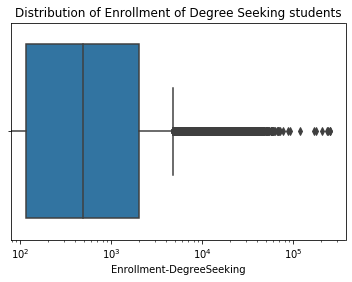

In [25]:
sns.boxplot('Enrollment-DegreeSeeking', data=data)
plt.title('Distribution of Enrollment of Degree Seeking students')
plt.xscale('log')
plt.show()

Given the wide range of enrollments and huge numbers of outliers, it might be helpful to convert enrollment into bins - small, medium, large, huge; or by number ranges.

The next column contains the Tuition Revenue per Full-Time equivalent student. According to the data dictionary, this is the net tuition revenue (tuition revenue minus discounts and allowances) divided by the number of FTE students (undergraduates and graduate students). Generally, a full time equivalence is 12 undergraduate credit hours or 6 graduate hours per semester.

In [26]:
print('Null count: ', data['TuitionRevenue/FTE'].isnull().sum())

zero = data.loc[data['TuitionRevenue/FTE']==0]
print('Schools with 0 TuitionRevenue/FTE', zero.shape[1])

data['TuitionRevenue/FTE'].describe()

Null count:  18644
Schools with 0 TuitionRevenue/FTE 32


count    1.060550e+05
mean     1.342372e+04
std      1.384292e+05
min      0.000000e+00
25%      2.489000e+03
50%      5.759000e+03
75%      1.062700e+04
max      2.667016e+07
Name: TuitionRevenue/FTE, dtype: float64

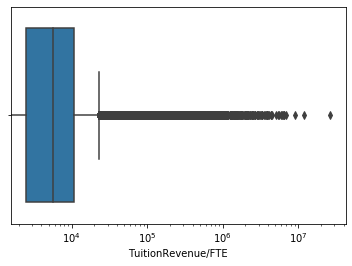

In [27]:
sns.boxplot('TuitionRevenue/FTE', data=data)
plt.xscale('log')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


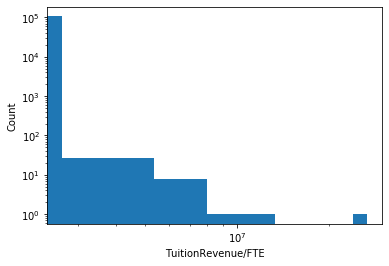

In [28]:
plt.hist(data['TuitionRevenue/FTE'])
plt.xlabel('TuitionRevenue/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

There seem to be a lot of schools with low TuitionRevenue/FTE, which warrant more exploring. As shown above, only 33 schools have 0 tuition revenue, though 18644 schools have null values. Again, it might be worth binning the Tuition Revenue column into ranges, or groups.

One school seems to have a much higher tuition than the others - Brooks College in Long Beach, CA. I'm going to drop this school.

In [29]:
high_tuition_school = data['TuitionRevenue/FTE'].max()
high_tuition = data.loc[data['TuitionRevenue/FTE']==high_tuition_school]
high_tuition.head()
data.drop(high_tuition.index, inplace=True)

Next, is the Expenditure/FTE column which contains "Instructional expenditures divided by the number of FTE students (undergraduates and graduate students) (http://nces.ed.gov/ipeds/glossary/index.asp?id=854)." 

In [30]:
print('Null count: ', data['Expenditure/FTE'].isnull().sum())
zero = data.loc[data['Expenditure/FTE']==0]
print('Schools with 0 Expenditure/FTE', zero.shape[1])

data['Expenditure/FTE'].describe()

Null count:  18650
Schools with 0 Expenditure/FTE 32


count    1.060480e+05
mean     1.659054e+04
std      9.458663e+05
min      0.000000e+00
25%      2.456000e+03
50%      4.160000e+03
75%      6.739000e+03
max      2.920157e+08
Name: Expenditure/FTE, dtype: float64

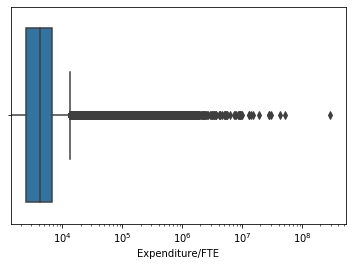

In [31]:
sns.boxplot('Expenditure/FTE', data=data)
plt.xscale('log')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


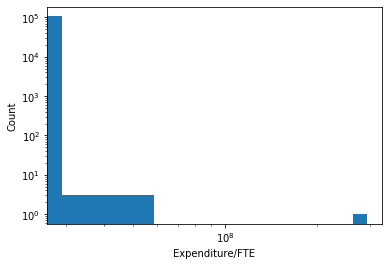

In [32]:
plt.hist(data['Expenditure/FTE'])
plt.xlabel('Expenditure/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

What is the school with the max value?  It seems to be way higher than even the other outliers.

In [33]:
max_expend = data['Expenditure/FTE'].max()
max_expenditure_school = data.loc[data['Expenditure/FTE']== max_expend]
max_expenditure_school
data.drop(max_expenditure_school.index, inplace=True)

I wonder why St. Joseph School of Nursing has such a high Expenditure/FTE. It is certificate granting institution with the highest degree as a certificate. I'm going to drop this school for now.

It will be interesting to see if Tuition/Revenue and Expenditure correlate.

The next column is Average Faculty Salary per month. According to the data dictionary, it is calculated from the "total salary outlays divided by the number of months worked for all full-time nonmedical instructional staff." 

In [34]:
print('Null count: ', data['AvgFaculty Salary'].isnull().sum())
zero = data.loc[data['AvgFaculty Salary']==0]
print('Schools with 0 AvgFaculty Salary', zero.shape[1])

data['AvgFaculty Salary'].describe()

Null count:  55046
Schools with 0 AvgFaculty Salary 32


count    69651.000000
mean      5137.658009
std       2038.513560
min          0.000000
25%       3864.000000
50%       4964.000000
75%       6236.000000
max      24892.000000
Name: AvgFaculty Salary, dtype: float64

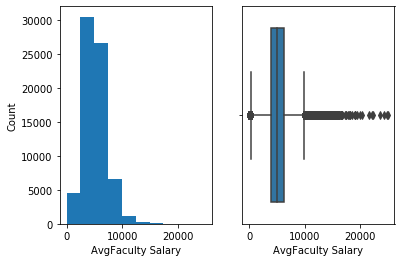

In [35]:
plt.subplot(1, 2, 1)
plt.hist(data['AvgFaculty Salary'])
plt.xlabel('AvgFaculty Salary')
plt.ylabel('Count')
#plt.xscale('log')

plt.subplot(1, 2, 2)
sns.boxplot('AvgFaculty Salary', data=data)
plt.show()

Given the wide distribution of these values, it might be worth putting them into bins.

The next column is the percentage of faculty that are fulltime faculty. The vlaue should be between 0 and 1.

In [36]:
print('Null count: ', data['Percent Fulltime Faculty'].isnull().sum())
zero = data.loc[data['Percent Fulltime Faculty']==0]
print('Schools with 0 Percent Fulltime Faculty', zero.shape[1])

data['Percent Fulltime Faculty'].describe()

Null count:  63747
Schools with 0 Percent Fulltime Faculty 32


count    60950.000000
mean         0.586062
std          0.299840
min          0.000000
25%          0.326500
50%          0.565250
75%          0.882400
max          1.166700
Name: Percent Fulltime Faculty, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


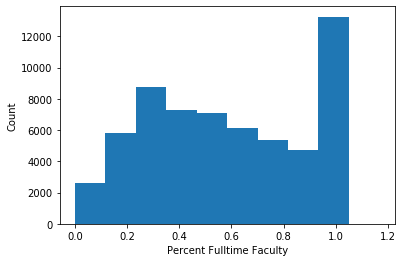

In [37]:
plt.hist(data['Percent Fulltime Faculty'])
plt.xlabel('Percent Fulltime Faculty')
plt.ylabel('Count')
plt.show()

The max value for this column is 1.16. Since the value is a percent, it doesn't make sense for a school to be able to have more than 100% fulltime faculty.

Only two schools (see below) have more than 100% full time faculty. (It seems reasonable to replace the values with 1, since a value of more than one doesn't make sense.) 

In [38]:
more_faculty = data.loc[data['Percent Fulltime Faculty']>1]
data.loc[more_faculty.index, 'Percent Fulltime Faculty'] = 1
more_faculty.head()

,Id,OPEID,Name,City,Zip,NumBranches,Primary degree type,High degree,Control,StateCode,...,PercentAidedLowIncome,PercentIndependent,PercentDependentLowIncome,PercentIndepentdentLowIncome,PercentFirstGen,AvgIncomeDependent,AvgIncomeIndep,MedianDebt,MedianDebtCompleters,MedianDebtNotComplete
40313,40314,01077900,porter and chester institute,STRATFORD,06615-7158,5,Predominantly certificate-degree granting,Certificate degree,Private for-profit,Connecticut,...,0.558626,0.597990,0.316667,0.721289,0.602041,71952.66983,31511.64518,7675.0,9700.0,3023.0
47675,47676,02337200,pj's college of cosmetology,BOWLING GREEN,42101,5,Predominantly certificate-degree granting,Certificate degree,Private for-profit,Kentucky,...,NaN,0.783972,0.451613,0.760000,0.648760,57244.45399,25578.47380,6625.0,7715.5,3363.0


The next column is shows the proportion of undergraduate students who completed their degree within 150% of the normal time at institutions that offer primarily certificate and associate's degree programs. These types of programs typically take less than 4 years to complete.

In [39]:
print('Null count: ', data['Completion<4yr'].isnull().sum())
zero = data.loc[data['Completion<4yr']==0]
print('Schools with 0 Completion < 4yr', zero.shape[1])

data['Completion<4yr'].describe()

Null count:  63229
Schools with 0 Completion < 4yr 32


count    61468.000000
mean         0.545545
std          0.274390
min          0.000000
25%          0.302500
50%          0.585300
75%          0.766525
max          1.000000
Name: Completion<4yr, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


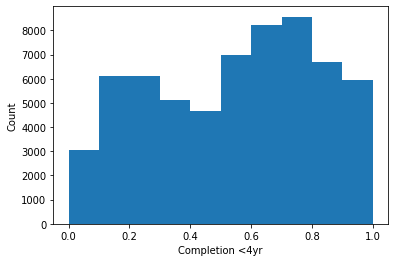

In [40]:
plt.hist(data['Completion<4yr'])
plt.xlabel('Completion <4yr')
plt.ylabel('Count')
plt.show()

Roughly half of the 'less than 4 year' institutions have more than half of their students who complete their programs withn 150% of the expected time.

The next column contains the percentage of student who complete their degree in 150% of time at 4-year institutions.

In [41]:
print('Null count: ', data['PercentCompleted4yr'].isnull().sum())
zero = data.loc[data['PercentCompleted4yr']==0]
print('Schools with 0 PercentCompleted4yr', zero.shape[1])

data['PercentCompleted4yr'].describe()

Null count:  53456
Schools with 0 PercentCompleted4yr 32


count    71241.000000
mean         0.370823
std          0.245872
min          0.000000
25%          0.149351
50%          0.371429
75%          0.571429
max          1.000000
Name: PercentCompleted4yr, dtype: float64

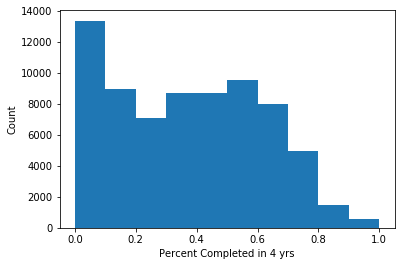

In [42]:
plt.hist(data['PercentCompleted4yr'])
plt.xlabel('Percent Completed in 4 yrs')
plt.ylabel('Count')
plt.show()

Unlike the less-than 4-yr schools, there are few 4-yr schools where the more than half of the students finish within 150% of the expected time frame. It will be interesting to see if or how the complete rate relates to other factors, particulary cost, student debt, and school closures.

In [43]:
print('Null count: ', data['PercentWithdraw4yr'].isnull().sum())
zero = data.loc[data['PercentWithdraw4yr']==0]
print('Schools with 0 PercentWithdraw4yr', zero.shape[1])

data['PercentWithdraw4yr'].describe()

Null count:  54470
Schools with 0 PercentWithdraw4yr 32


count    70227.000000
mean         0.209453
std          0.147123
min          0.000000
25%          0.102837
50%          0.199797
75%          0.301848
max          0.860437
Name: PercentWithdraw4yr, dtype: float64

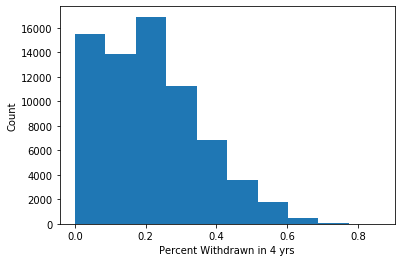

In [44]:
plt.hist(data['PercentWithdraw4yr'])
plt.xlabel('Percent Withdrawn in 4 yrs')
plt.ylabel('Count')
plt.show()

In [45]:
print('Null count: ', data['PercentEnrolled4yr'].isnull().sum())
zero = data.loc[data['PercentEnrolled4yr']==0]
print('Schools with 0 PercentEnrolled4yr', zero.shape[1])

data['PercentEnrolled4yr'].describe()

Null count:  62255
Schools with 0 PercentEnrolled4yr 32


count    62442.000000
mean         0.041563
std          0.052636
min          0.000000
25%          0.000000
50%          0.025943
75%          0.068503
max          0.779661
Name: PercentEnrolled4yr, dtype: float64

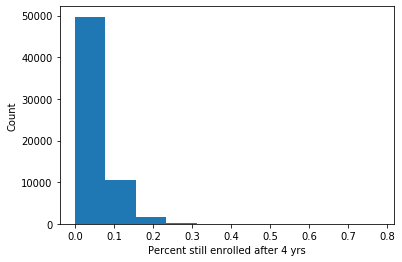

In [46]:
plt.hist(data['PercentEnrolled4yr'])
plt.xlabel('Percent still enrolled after 4 yrs')
plt.ylabel('Count')
plt.show()

In [47]:
print('Null count: ', data['PercentAge>25'].isnull().sum())
zero = data.loc[data['PercentAge>25']==0]
print('Schools with 0 PercentAge>25', zero.shape[1])

data['PercentAge>25'].describe()

Null count:  72108
Schools with 0 PercentAge>25 32


count    52589.000000
mean         0.405559
std          0.219877
min          0.000000
25%          0.243200
50%          0.403100
75%          0.554500
max          1.000000
Name: PercentAge>25, dtype: float64

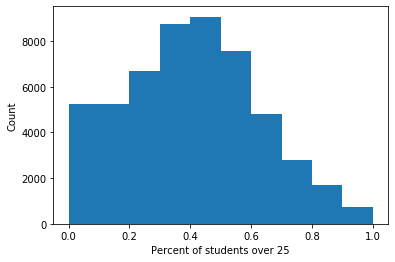

In [48]:
plt.hist(data['PercentAge>25'])
plt.xlabel('Percent of students over 25')
plt.ylabel('Count')
plt.show()

In [49]:
print('Null count: ', data['PercentAidedLowIncome'].isnull().sum())
zero = data.loc[data['PercentAidedLowIncome']==0]
print('Schools with 0 PercentAidedLowIncome', zero.shape[1])

data['PercentAidedLowIncome'].describe()

Null count:  61213
Schools with 0 PercentAidedLowIncome 32


count    63484.000000
mean         0.653937
std          0.194975
min          0.000000
25%          0.526316
50%          0.688997
75%          0.804468
max          1.000000
Name: PercentAidedLowIncome, dtype: float64

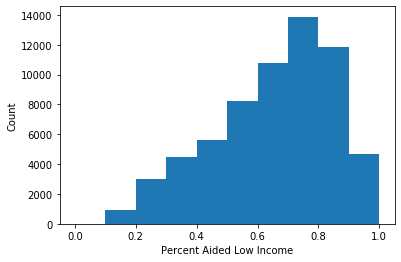

In [50]:
plt.hist(data['PercentAidedLowIncome'])
plt.xlabel('Percent Aided Low Income')
plt.ylabel('Count')
plt.show()

In [51]:
print('Null count: ', data['PercentIndependent'].isnull().sum())
zero = data.loc[data['PercentIndependent']==0]
print('Schools with 0 PercentIndependent', zero.shape[1])

data['PercentIndependent'].describe()

Null count:  15552
Schools with 0 PercentIndependent 32


count    109145.000000
mean          0.562163
std           0.253411
min           0.000000
25%           0.380282
50%           0.611111
75%           0.760891
max           1.000000
Name: PercentIndependent, dtype: float64

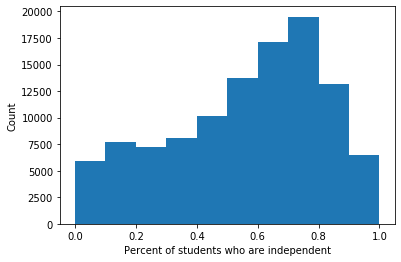

In [52]:
plt.hist(data['PercentIndependent'])
plt.xlabel('Percent of students who are independent')
plt.ylabel('Count')
plt.show()

In [53]:
print('Null count: ', data['PercentDependentLowIncome'].isnull().sum())
zero = data.loc[data['PercentDependentLowIncome']==0]
print('Schools with 0 PercentDependentLowIncome', zero.shape[1])

data['PercentDependentLowIncome'].describe()

Null count:  42657
Schools with 0 PercentDependentLowIncome 32


count    82040.000000
mean         0.487150
std          0.194155
min          0.000000
25%          0.327445
50%          0.483177
75%          0.630393
max          1.000000
Name: PercentDependentLowIncome, dtype: float64

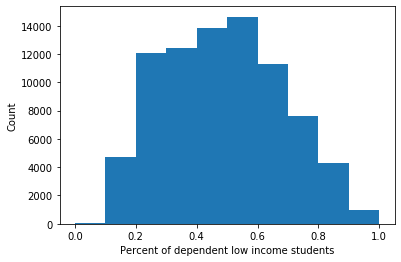

In [54]:
plt.hist(data['PercentDependentLowIncome'])
plt.xlabel('Percent of dependent low income students')
plt.ylabel('Count')
plt.show()

In [55]:
print('Null count: ', data['PercentIndepentdentLowIncome'].isnull().sum())
zero = data.loc[data['PercentIndepentdentLowIncome']==0]
print('Schools with 0 PercentIndepentdentLowIncome', zero.shape[1])

data['PercentIndepentdentLowIncome'].describe()

Null count:  42514
Schools with 0 PercentIndepentdentLowIncome 32


count    82183.000000
mean         0.787203
std          0.116845
min          0.227034
25%          0.732233
50%          0.807712
75%          0.868637
max          1.000000
Name: PercentIndepentdentLowIncome, dtype: float64

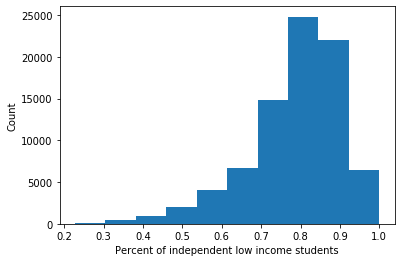

In [56]:
plt.hist(data['PercentIndepentdentLowIncome'])
plt.xlabel('Percent of independent low income students')
plt.ylabel('Count')
plt.show()

In [57]:
print('Null count: ', data['PercentFirstGen'].isnull().sum())
zero = data.loc[data['PercentFirstGen']==0]
print('Schools with 0 PercentFirstGen', zero.shape[1])

data['PercentFirstGen'].describe()

Null count:  21887
Schools with 0 PercentFirstGen 32


count    102810.000000
mean          0.496133
std           0.135729
min           0.000000
25%           0.415525
50%           0.511708
75%           0.583333
max           1.000000
Name: PercentFirstGen, dtype: float64

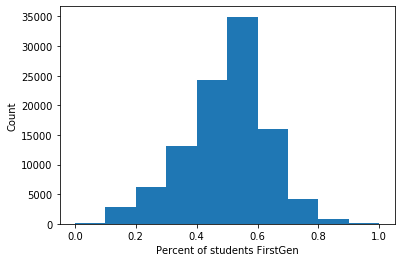

In [58]:
plt.hist(data['PercentFirstGen'])
plt.xlabel('Percent of students FirstGen')
plt.ylabel('Count')
plt.show()

In [59]:
print('Null count: ', data['AvgIncomeDependent'].isnull().sum())
zero = data.loc[data['AvgIncomeDependent']==0]
print('Schools with 0 AvgIncomeDependent', zero.shape[1])

data['AvgIncomeDependent'].describe()

Null count:  20592
Schools with 0 AvgIncomeDependent 32


count    104105.000000
mean      51699.970058
std       24105.839370
min         246.550640
25%       32901.468090
50%       48484.402690
75%       67701.453360
max      189041.801900
Name: AvgIncomeDependent, dtype: float64

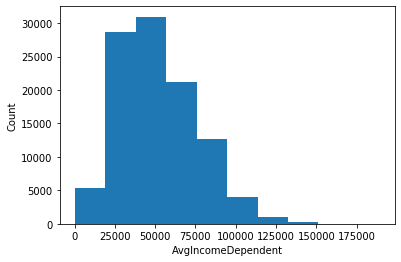

In [60]:
plt.hist(data['AvgIncomeDependent'])
plt.xlabel('AvgIncomeDependent')
plt.ylabel('Count')
plt.show()

In [61]:
print('Null count: ', data['AvgIncomeIndep'].isnull().sum())
zero = data.loc[data['AvgIncomeIndep']==0]
print('Schools with 0 AvgIncomeIndep', zero.shape[1])

data['AvgIncomeIndep'].describe()

Null count:  20110
Schools with 0 AvgIncomeIndep 32


count    104587.000000
mean      22996.918424
std        9875.164288
min           0.000000
25%       16418.056615
50%       21541.188940
75%       27586.208095
max      103946.461300
Name: AvgIncomeIndep, dtype: float64

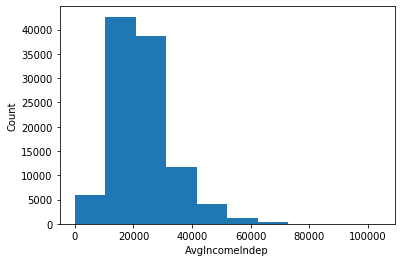

In [62]:
plt.hist(data['AvgIncomeIndep'])
plt.xlabel('AvgIncomeIndep')
plt.ylabel('Count')
plt.show()

In [63]:
print('Null count: ', data['MedianDebt'].isnull().sum())
zero = data.loc[data['MedianDebt']==0]
print('Schools with 0 MedianDebt', zero.shape[1])

data['MedianDebt'].describe()

Null count:  29830
Schools with 0 MedianDebt 32


count     94867.000000
mean       8917.916441
std        4952.591412
min         124.000000
25%        5250.000000
50%        7937.000000
75%       12000.000000
max      131335.000000
Name: MedianDebt, dtype: float64

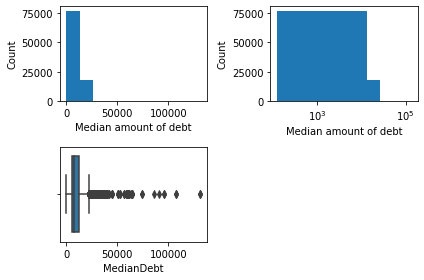

In [64]:
plt.subplot(2, 2, 1)
plt.hist(data['MedianDebt'])
plt.xlabel('Median amount of debt')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(data['MedianDebt'])
plt.xlabel('Median amount of debt')
plt.ylabel('Count')
plt.xscale('log')

plt.subplot(2, 2, 3)
sns.boxplot('MedianDebt', data=data)
plt.tight_layout()
plt.show()

In [65]:
print('Null count: ', data[ 'MedianDebtCompleters'].isnull().sum())
zero = data.loc[data['MedianDebtCompleters' ]==0]
print('Schools with 0 MedianDebtCompleters', zero.shape[1])

data['MedianDebtCompleters' ].describe()

Null count:  36874
Schools with 0 MedianDebtCompleters 32


count    87823.000000
mean     12368.730862
std       7217.114498
min        310.000000
25%       6625.000000
50%      10895.000000
75%      17125.000000
max      53831.500000
Name: MedianDebtCompleters, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


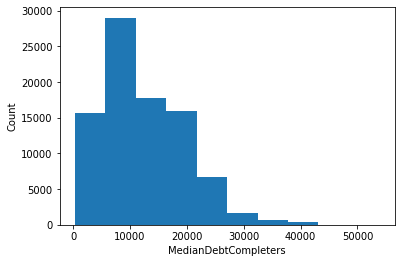

In [66]:
plt.hist(data['MedianDebtCompleters'])
plt.xlabel('MedianDebtCompleters')
plt.ylabel('Count')
plt.show()

In [67]:
print('Null count: ', data['MedianDebtNotComplete'].isnull().sum())
zero = data.loc[data[ 'MedianDebtNotComplete']==0]
print('Schools with 0 MedianDebtNotComplete', zero.shape[1])

data['MedianDebtNotComplete'].describe()

Null count:  36734
Schools with 0 MedianDebtNotComplete 32


count    87963.000000
mean      6445.380751
std       3523.085343
min        383.000000
25%       3719.000000
50%       5500.000000
75%       8750.000000
max      35125.000000
Name: MedianDebtNotComplete, dtype: float64

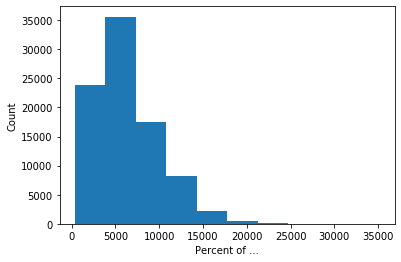

In [68]:
plt.hist(data['MedianDebtNotComplete'])
plt.xlabel('Percent of ...')
plt.ylabel('Count')
plt.show()

## Explore CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- How does this relate to control?

In [69]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

closed = data.loc[data['CURROPER']==False]
print('Closed:  ', closed.shape[0])

Open:   101120
Closed:   23577


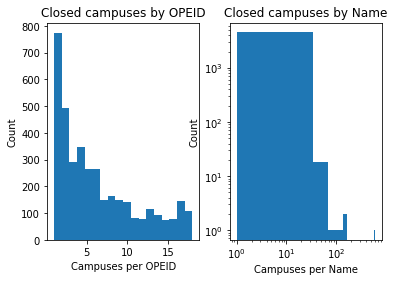

In [70]:
#How many schools are open/closed by name? by OPEID?
closed.OPEID.value_counts()

plt.subplot(1, 2, 1)
plt.hist(closed.OPEID.value_counts(), bins=18)
plt.xlabel('Campuses per OPEID')
plt.ylabel('Count')
plt.title('Closed campuses by OPEID')

plt.subplot(1, 2, 2)
plt.hist(closed.Name.value_counts(), bins=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Campuses per Name')
plt.ylabel('Count')
plt.title('Closed campuses by Name')
plt.tight_layout
plt.show()

In [86]:
closed.Name.value_counts()

itt technical institute                               599
empire beauty school                                  147
marinello school of beauty                            137
lincoln technical institute                           117
sanford-brown college                                  68
                                                     ... 
firelands regional medical center school of nursin      1
career education institute-norcross                     1
carolinas medical center school of radiologic tech      1
academy of hair design 7                                1
devry university-virginia                               1
Name: Name, Length: 4560, dtype: int64

ITT Technical institute is the school name with the most number of campuses that are closed. This isn't surprising, since ITT Tech closed several years ago.

## Bivariate exploration

### College enrollment

How does college enrollment correlate with tuition revenue, expenditure, school type and operating status?

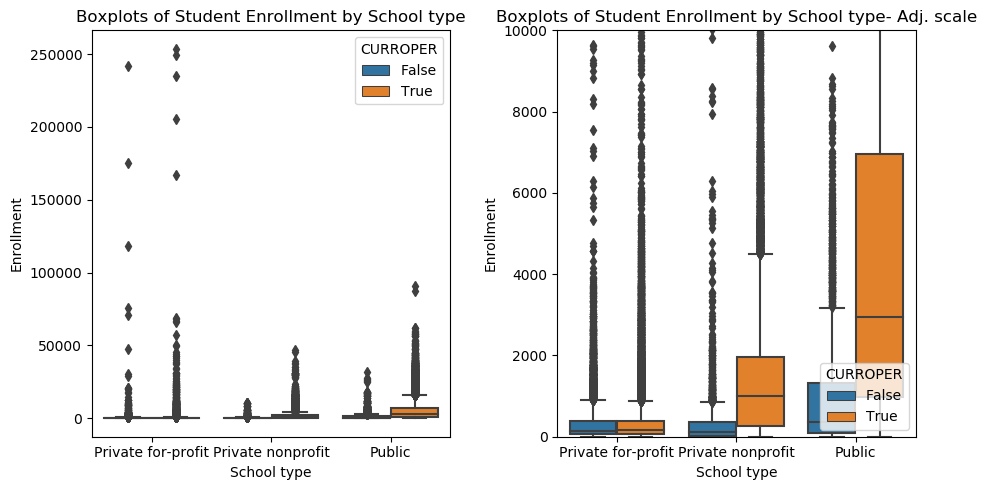

In [71]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Boxplots of Student Enrollment by School type')
plt.xlabel('School type')
plt.ylabel('Enrollment')

plt.subplot(1, 2, 2)
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Boxplots of Student Enrollment by School type- Adj. scale')
plt.ylim((0,10000))
plt.xlabel('School type')
plt.ylabel('Enrollment')
plt.tight_layout()
plt.show()

The schools with the highest enrollment, in fact, the 8 schools with more than 100,000 students, are all private for-profit schools. Zooming in on the plot to include just schools with less than 100,000 students gives a more detailed view of the bulk of the data.

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Currently operating public schools have the highest median enrollment.

Given the high number of values outside the IQR range for all three school types it seems like binning the values for enrollment would make sense. - How do I decide what range of bins to use?

For the time being, I am going to exclude schools with Enrollment over 100,000 from the analysis.

In [72]:
high_enrollment = data.loc[data['Enrollment-DegreeSeeking']>100000]
print(high_enrollment.Control.value_counts())
data.drop(high_enrollment.index, inplace=True)

Private for-profit    8
Public                0
Private nonprofit     0
Name: Control, dtype: int64


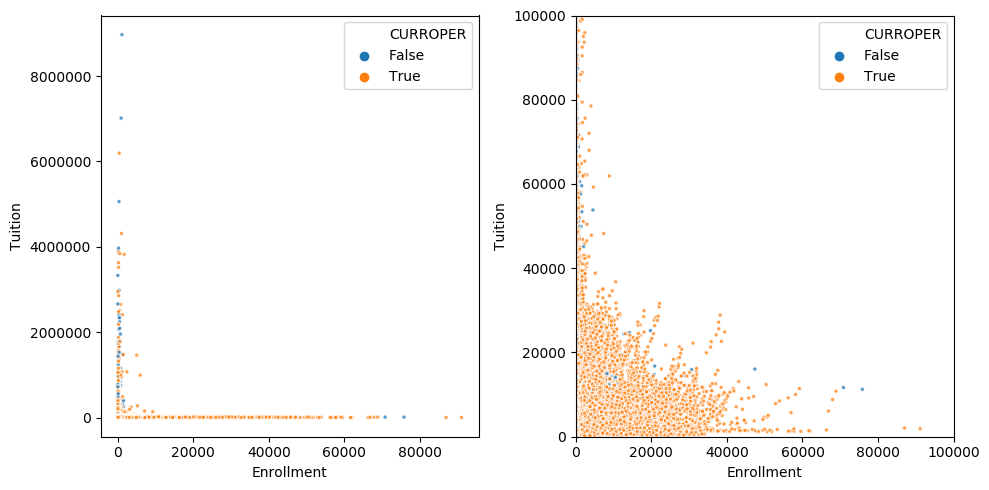

In [73]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.tight_layout()
plt.show()

Even with the highest tuition school excluded earlier, there are still several schools with tuition revenue higher than 5 million. From the left chart above, it appears that three of these schools are closed, and one in currenlty operating.

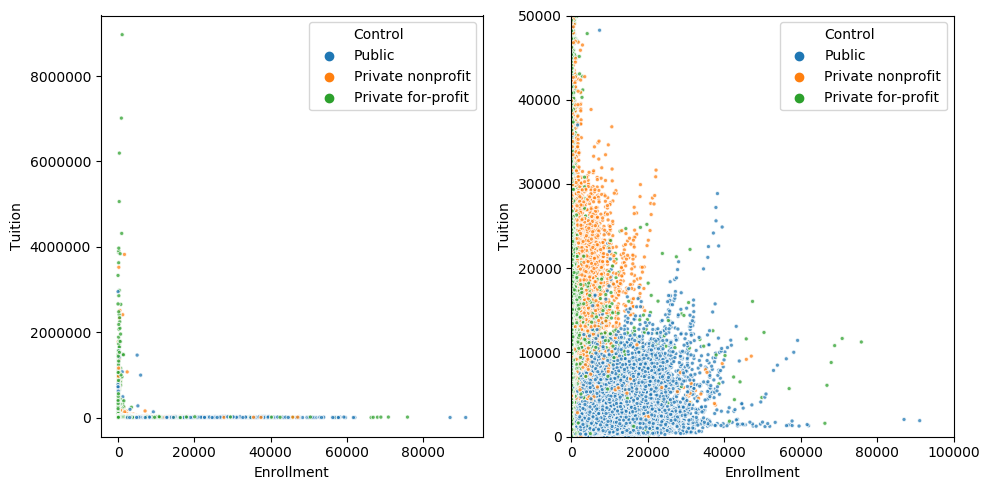

In [74]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'TuitionRevenue/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

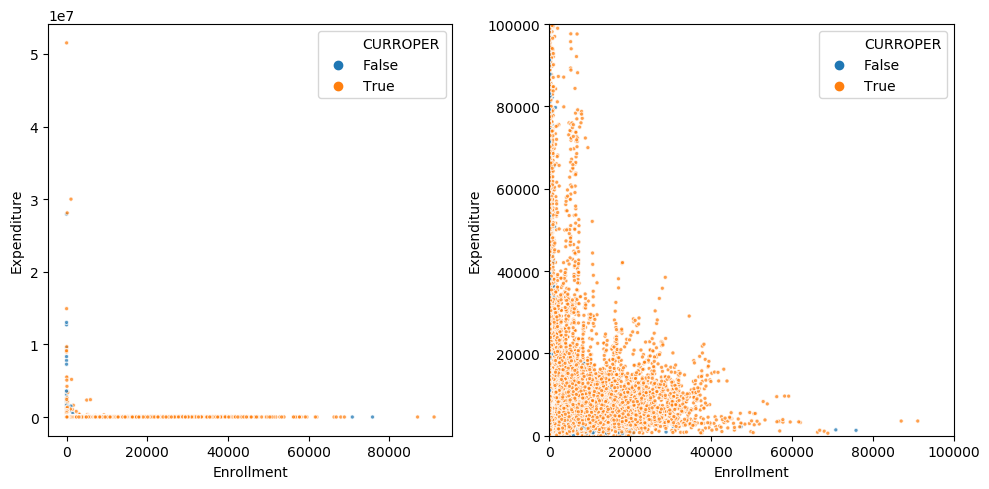

In [75]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.tight_layout()
plt.show()

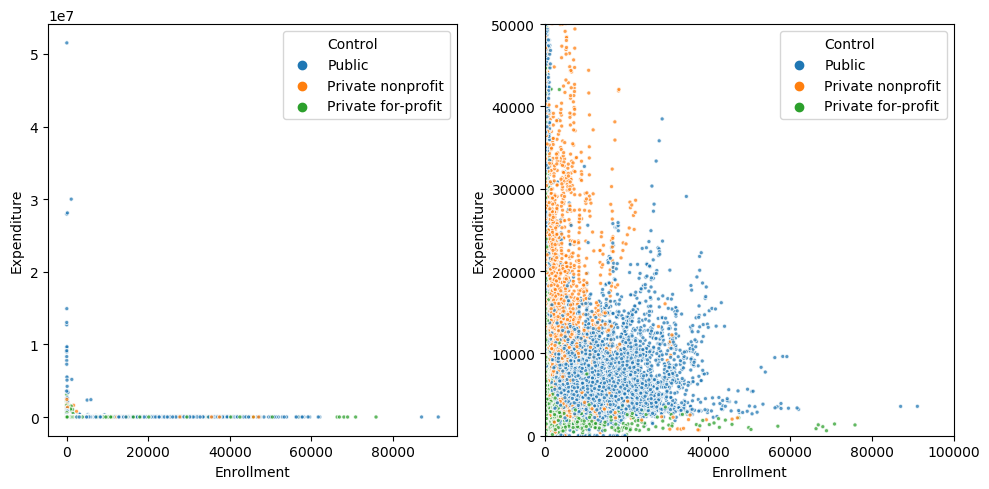

In [76]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')

plt.subplot(1, 2, 2)
sns.scatterplot('Enrollment-DegreeSeeking', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

### Tuition and Expenditure
How does tuition revenue correlate with expenditure, school type and operating status?

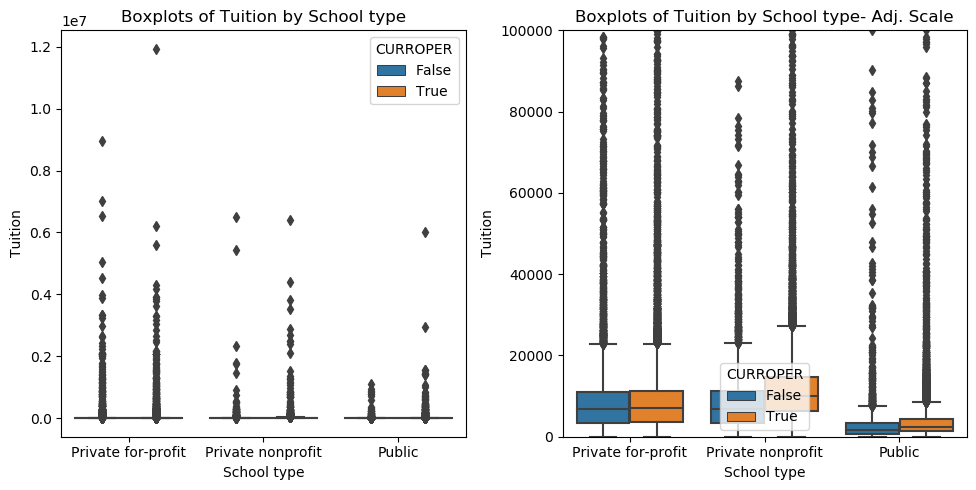

In [77]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition by School type')
plt.ylabel('Tuition')
plt.xlabel('School type')

plt.subplot(1, 2, 2)
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition by School type- Adj. Scale')
plt.ylim(0, 100000)
plt.ylabel('Tuition')
plt.xlabel('School type')
plt.tight_layout()
plt.show()

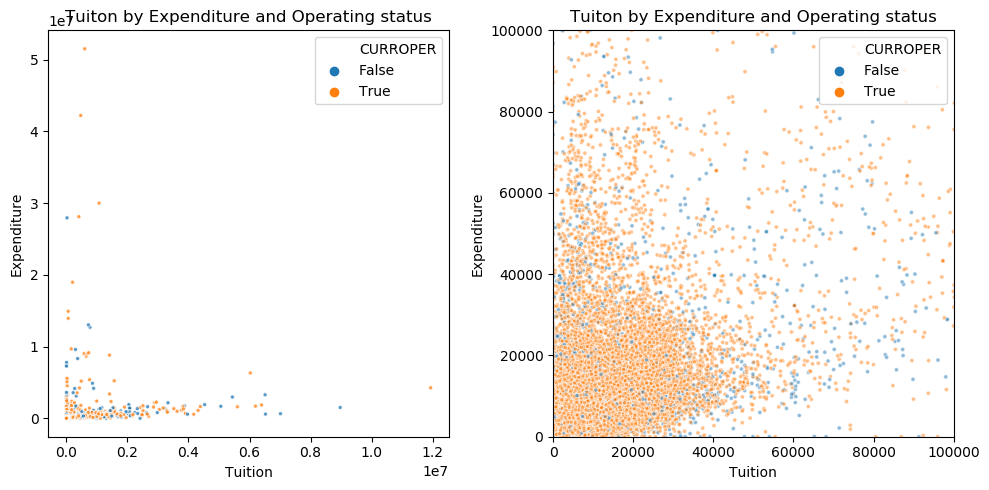

In [78]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and Operating status')

plt.subplot(1, 2, 2)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='CURROPER', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and Operating status')
plt.tight_layout()
plt.show()

I thought that perhaps tuition and expenditure would correlate - especially for the schools with the highest tuition and the highest expenditure. While there may be a correlation between tuition and expenditure in general, the schools with the highest expenditure are not the schools with the highest tuition, and vice versa.

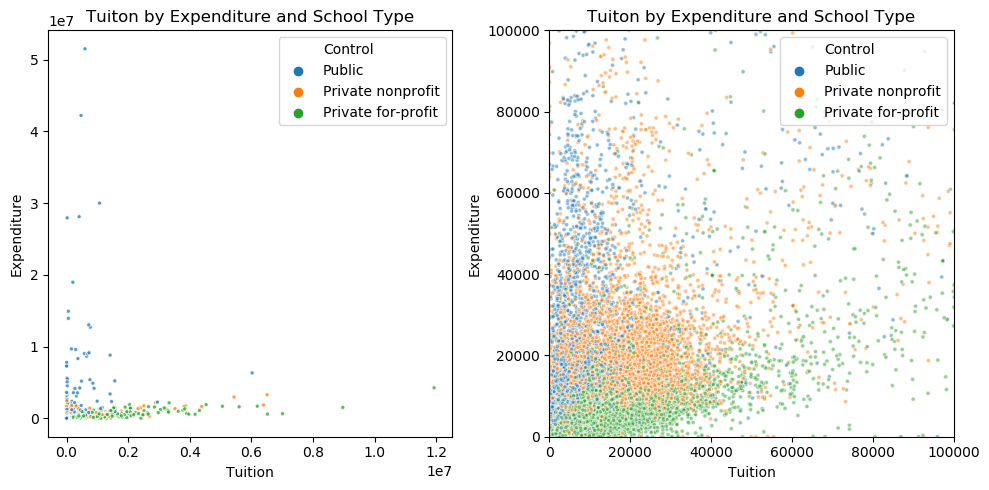

In [79]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and School Type')

plt.subplot(1, 2, 2)
sns.scatterplot('TuitionRevenue/FTE', 'Expenditure/FTE', data=data, hue='Control', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and School Type')
plt.tight_layout()
plt.show()

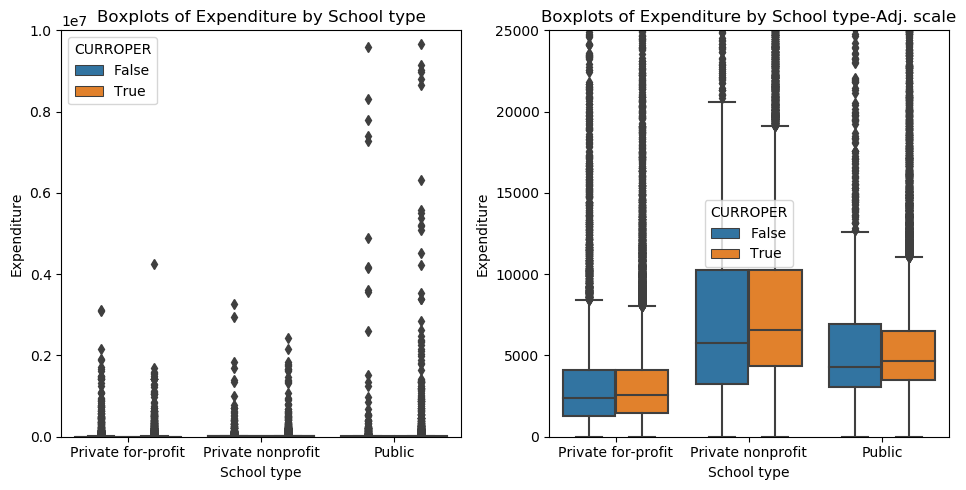

In [80]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Expenditure by School type')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim(0, 10000000)

plt.subplot(1, 2, 2)
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Expenditure by School type-Adj. scale')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim((0,25000))
plt.tight_layout()
plt.show()

There are more public schools with really high expenditure levels, but the median private nonprofit school spends more on students than the other two types of schools.

Text(0.5, 1.0, 'Boxplots of Tuition Revene per student by School type')

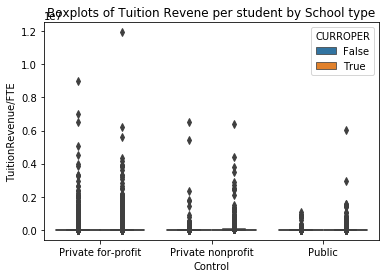

In [82]:
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition Revene per student by School type')

Text(0.5, 1.0, 'Boxplots of Expenditure per student by School type')

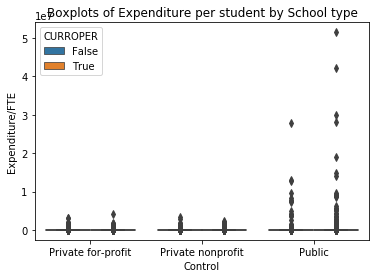

In [83]:
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Expenditure per student by School type')

Extreme outlier in closed nonprofit private school is distorting the data.

### Inferential Statistics Hint: 
Do any particular results in your data strike you as [abnormal]? What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test? Take some time to recall your statistical concepts, such as that the [p-value] of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis.

Private-for profit school has an extreme outlier - which school is it?

Text(0.5, 1.0, 'Boxplots of Percent First Generation students by School type')

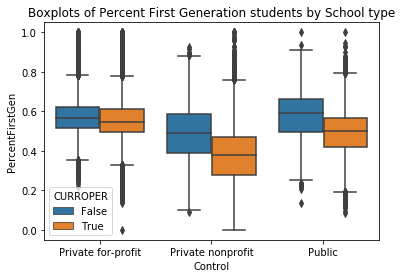

In [84]:
#Create boxplots of the colunms
sns.boxplot('Control', 'PercentFirstGen', data=data, hue = 'CURROPER')

plt.title('Boxplots of Percent First Generation students by School type')

In [85]:
Extreme outlier in closed nonprofit private school is distorting the data.

SyntaxError: invalid syntax (<ipython-input-85-598632878515>, line 1)

## Explore data relationships

### Data Visualization Hint: 
Recall your [matplotlib] and [seaborn] functions for data visualization: 
Matplotlib:
- plt.plot()
- plt.xlabel() 
- plt.show() 
- plt.hist(),
Seaborn:
- sns.relplot() 
- sns.lmplot() 
- sns.catplot().

### Feature Selection and Engineering Hint: 
Feature selection is where data storytelling starts: we tell a story as soon as we include certain features and omit others. But how we manipulate - or engineer - those fields is just as important. Recall the crucial elements to feature engineering:
- If you have categorical features, you might need to [one-hot encode] them
- You may need to [binarize] your columns and [bin] your values.
- To handle missing data, think about how appropriate the methods of [listwise
deletion, data imputation, replacing missing values with constants] or simply attempting to [find the missing values] are for your data.
- Think about whether you need to [standardize, log-transform or normalize] your data, as well as statistically valid ways to remove outliers.